<a href="https://colab.research.google.com/github/HunterTzou/DATA_110_FALL_2025/blob/main/Tzou_Hunter_Sleep_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep Health and Lifestyle Study
**Hunter Tzou - DATA 110 Project 1**

## Introduction

Sleep is one of the most important components of our lives and one which is often neglected. I believe that we could all practice better sleep hygiene and by studying this dataset, I am hoping that we might be able to improve our sleep.

The [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep) says that we could see the following benefits from getting more sleep:
- Get sick less often
- Stay at a healthy weight
- Lower your risk for serious health problems, like diabetes and heart disease
- Reduce stress, improve your mood, and get along better with people
- Think more clearly, form long-term memories, and do better in school and at work
- Make good decisions and avoid injuries — for example, drowsy drivers cause thousands of car accidents every year

Due to experiencing some of the negative side effects of chronic sleep deprivation, I wanted to study the different lifestyle components which could affect our sleep.

### Research Questions
1. How does stress level correlate with sleep duration and quality?
2. Does physical activity level impact sleep quality?
3. Is there a relationship between BMI category and sleep disorders?

## Data Source and Data Dictionary

This dataset was picked from [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data). I picked this dataset because I am interested in sleep studies and how different health and lifestyle variables can affect sleep quality. I also saw that this dataset had enough depth for me to use for this project.

### Data Dictionary

| **Column Name** | **Description** |
|------------------|-----------------|
| `Person ID` | Unique identifier for each individual. |
| `Gender` | Gender of the person (`Male` or `Female`). |
| `Age` | Age of the person in years. |
| `Occupation` | Occupation or profession of the person. |
| `Sleep Duration (hours)` | Number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | Subjective rating of sleep quality, ranging from 1 (poor) to 10 (excellent). |
| `Physical Activity Level (minutes/day)` | Number of minutes the person engages in physical activity daily. |
| `Stress Level (scale: 1-10)` | Subjective rating of stress level, ranging from 1 (low) to 10 (high). |
| `BMI Category` | Body Mass Index category (`Underweight`, `Normal`, `Overweight`). |
| `Blood Pressure (systolic/diastolic)` | Blood pressure measurement in systolic/diastolic format (e.g., 120/80). |
| `Heart Rate (bpm)` | Resting heart rate of the person, measured in beats per minute. |
| `Daily Steps` | Number of steps the person takes per day. |
| `Sleep Disorder` | Indicates whether the person has a sleep disorder (`None`, `Insomnia`, `Sleep Apnea`). |

**Sleep Disorder Details:**
- `None`: The individual does not exhibit any specific sleep disorder.
- `Insomnia`: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- `Sleep Apnea`: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

According to the [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep), adults need a minimum of 7 hours of good quality sleep. We will define good quality of sleep as above 5. Anything below this standard is defined as inadequate sleep.

### Possible Dataset Shortcomings

Based on the [ODPHP's website](https://odphp.health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep), sleep schedule is an important factor in both the quality of sleep and the benefits we receive. This is missing from this dataset, so I think that would be something to add to make it more robust.

## Data Loading and Setup

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Zhouhun/DATA_110_FALL_2025/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv')

## AI Acknowledgement: I had Chat GPT give me a color palette
sleep_palette = [
    '#4C72B0',  # Deep royal blue (bold)
    '#6A5ACD',  # Vibrant violet-blue (bold)
    '#C5B4E3',  # Soft lavender
    '#A8C5E2',  # Pastel sky blue
    '#9D81BA',  # Muted purple highlight
    '#DCE3F2'   # Pale gray-blue (neutral)
]

## Exploratory Data Analysis

### Initial Data Inspection

In [110]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)
print("\n")

# Display first 10 rows
print("First 10 rows of the dataset:")
df.head(10)

Dataset shape: (374, 13)


First 10 rows of the dataset:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [111]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Data Cleaning

**Handling Missing Values:**

In [112]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

## AI Acknowledgement: I learned how to replace null values from ChatGPT
# Replace None values in Sleep Disorder column
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Verify the fix
print("\nAfter filling missing values:")
print(df.isnull().sum())

Missing values per column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

After filling missing values:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


**Checking for Unique Person IDs:**

In [113]:
# Verify Person ID is unique
print("Are Person IDs unique?", df['Person ID'].is_unique)

Are Person IDs unique? True


**Checking for Duplicates:**

In [114]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


### Data Standardization

**Normalizing Categorical Values:**

In [115]:
# Check unique values in object columns
print("Unique values in Gender:", df['Gender'].unique())
print("Unique values in Occupation:", df['Occupation'].unique())
print("Unique values in BMI Category:", df['BMI Category'].unique())
print("Unique values in Sleep Disorder:", df['Sleep Disorder'].unique())

# Standardize BMI Category
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

# Consolidate Occupation categories
df['Occupation'] = df['Occupation'].replace({'Software Engineer': 'Engineer'})
df['Occupation'] = df['Occupation'].replace({'Sales Representative': 'Salesperson'})

print("\nAfter standardization:")
print("Unique Occupations:", df['Occupation'].unique())
print("Unique BMI Categories:", df['BMI Category'].unique())

Unique values in Gender: ['Male' 'Female']
Unique values in Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']

After standardization:
Unique Occupations: ['Engineer' 'Doctor' 'Salesperson' 'Teacher' 'Nurse' 'Accountant'
 'Scientist' 'Lawyer' 'Manager']
Unique BMI Categories: ['Overweight' 'Normal' 'Obese']


### Creating Derived Columns

**Age Categories:**

In [116]:
## AI Acknowledgement: I asked ChatGPT how to apply custom logic to create new columns
def age_category(row):
    age = row['Age']
    if age < 35:
        return '25–34'
    elif 35 <= age <= 44:
        return '35–44'
    elif 45 <= age <= 54:
        return '45–54'
    elif age >= 55:
        return '55–64'
    else:
        return 'Unknown'

df['Age Category'] = df.apply(age_category, axis=1)
print("Age categories created successfully")
df[['Age', 'Age Category']].head()

Age categories created successfully


,Age,Age Category
0,27,25–34
1,28,25–34
2,28,25–34
3,28,25–34
4,28,25–34


**Blood Pressure Analysis:**

In [117]:
## AI Acknowledgement: I asked ChatGPT how to split a string into two columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Categorize blood pressure based on AHA guidelines
def bp_category(row):
    sys, dia = row['Systolic'], row['Diastolic']
    if sys < 120 and dia < 80:
        return 'Normal'
    elif 120 <= sys <= 129 and dia < 80:
        return 'Elevated'
    elif (130 <= sys <= 139) or (80 <= dia <= 89):
        return 'Stage 1 Hypertension'
    elif sys >= 140 or dia >= 90:
        return 'Stage 2 Hypertension'
    elif sys > 180 or dia > 120:
        return 'Hypertensive Emergency'
    else:
        return 'Unknown'

df['BP Category'] = df.apply(bp_category, axis=1)

print("Blood pressure categories created successfully")
df[['Blood Pressure', 'Systolic', 'Diastolic', 'BP Category']].head()

Blood pressure categories created successfully


,Blood Pressure,Systolic,Diastolic,BP Category
0,126/83,126,83,Stage 1 Hypertension
1,125/80,125,80,Stage 1 Hypertension
2,125/80,125,80,Stage 1 Hypertension
3,140/90,140,90,Stage 2 Hypertension
4,140/90,140,90,Stage 2 Hypertension


### Summary Statistics

In [118]:
# Display summary statistics
print("Summary Statistics for Numeric Columns:")
df.describe().round(2)

Summary Statistics for Numeric Columns:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84,128.55,84.65
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92,7.75,6.16
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00,115.00,75.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00,125.00,80.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00,130.00,85.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00,135.00,90.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00,142.00,95.00


### Demographic Analysis

**Gender Distribution:**

In [119]:
gender_summary = df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)
gender_summary['#'] = df['Gender'].value_counts()
gender_summary['% of Total'] = df['Gender'].value_counts(normalize=True) * 100
gender_summary = gender_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate',
    'Sleep Duration': 'Avg. Sleep Duration',
    'Quality of Sleep': 'Avg. Sleep Quality'
})
gender_summary['Avg. BP Category'] = gender_summary.apply(bp_category, axis=1)
gender_summary = gender_summary[['#', '% of Total', 'Avg. Sleep Duration', 'Avg. Sleep Quality','Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

print("Gender Distribution and Averages:")
gender_summary

Gender Distribution and Averages:


,#,% of Total,Avg. Sleep Duration,Avg. Sleep Quality,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Gender,,,,,,,,,
Female,185,49.47,7.23,7.66,4.68,69.26,130.20,86.32,Stage 1 Hypertension
Male,189,50.53,7.04,6.97,6.08,71.05,126.94,83.02,Stage 1 Hypertension


**Age Distribution:**

In [120]:
Age_summary = df.groupby('Age Category')[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate', 'Systolic', 'Diastolic']].mean().round(2)
Age_summary['#'] = df['Age Category'].value_counts()
Age_summary['% of Total'] = df['Age Category'].value_counts(normalize=True) * 100
Age_summary = Age_summary.rename(columns={
    'Stress Level': 'Avg Stress Level',
    'Heart Rate': 'Avg Heart Rate',
    'Sleep Duration': 'Avg. Sleep Duration',
    'Quality of Sleep': 'Avg. Sleep Quality'
})
Age_summary['Avg. BP Category'] = Age_summary.apply(bp_category, axis=1)
Age_summary = Age_summary[['#', '% of Total', 'Avg. Sleep Duration', 'Avg. Sleep Quality','Avg Stress Level', 'Avg Heart Rate', 'Systolic', 'Diastolic', 'Avg. BP Category']].round(2)

print("Age Distribution and Averages:")
Age_summary

Age Distribution and Averages:


,#,% of Total,Avg. Sleep Duration,Avg. Sleep Quality,Avg Stress Level,Avg Heart Rate,Systolic,Diastolic,Avg. BP Category
Age Category,,,,,,,,,
25–34,82,21.93,6.80,6.32,6.89,72.33,123.63,81.01,Stage 1 Hypertension
35–44,168,44.92,7.10,7.40,5.15,69.57,126.54,82.86,Stage 1 Hypertension
45–54,89,23.80,7.12,7.40,5.36,70.13,132.89,87.75,Stage 1 Hypertension
55–64,35,9.36,8.10,9.00,3.06,68.06,138.74,93.86,Stage 1 Hypertension


**Key Observations:**
- Gender distribution is slightly unequal but fairly balanced
- Majority of participants are in the 35-44 age range (~38%)
- Most participants fall into Stage 1 Hypertension blood pressure category
- Average sleep duration is above the minimum 7 hours recommended
- Average sleep quality is above 5 (our threshold for adequate sleep)

---

## Visualization 1: Stress Level and Sleep Quality

These visualizations examine the relationship between stress level (inverted so higher is better), sleep duration, and sleep quality across different occupations. The goal is to determine whether occupations with lower stress levels also experience better sleep quality and duration.  

### Data Preparation

In [121]:
# Invert stress level (so higher values = less stress = better)
df['Inverted Stress Level'] = 11 - df['Stress Level']

## AI Acknowledgement: I asked ChatGPT how to normalize values for comparison
scaler = MinMaxScaler(feature_range=(1, 10))
col_scale = ['Sleep Duration']
df_scaled = df.copy()
df_scaled[col_scale] = scaler.fit_transform(df_scaled[col_scale]).round(2)

# Create summary by occupation
stress_viz = df_scaled.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep','Inverted Stress Level']].mean().round(2)
stress_viz = stress_viz.sort_values(by='Quality of Sleep', ascending=False)

print("Data prepared for visualization")
stress_viz.head()

Data prepared for visualization


,Sleep Duration,Quality of Sleep,Inverted Stress Level
Occupation,,,
Engineer,8.05,8.30,6.99
Accountant,5.38,7.89,6.41
Lawyer,6.37,7.89,5.94
Nurse,5.21,7.37,5.45
Manager,4.67,7.00,6.00


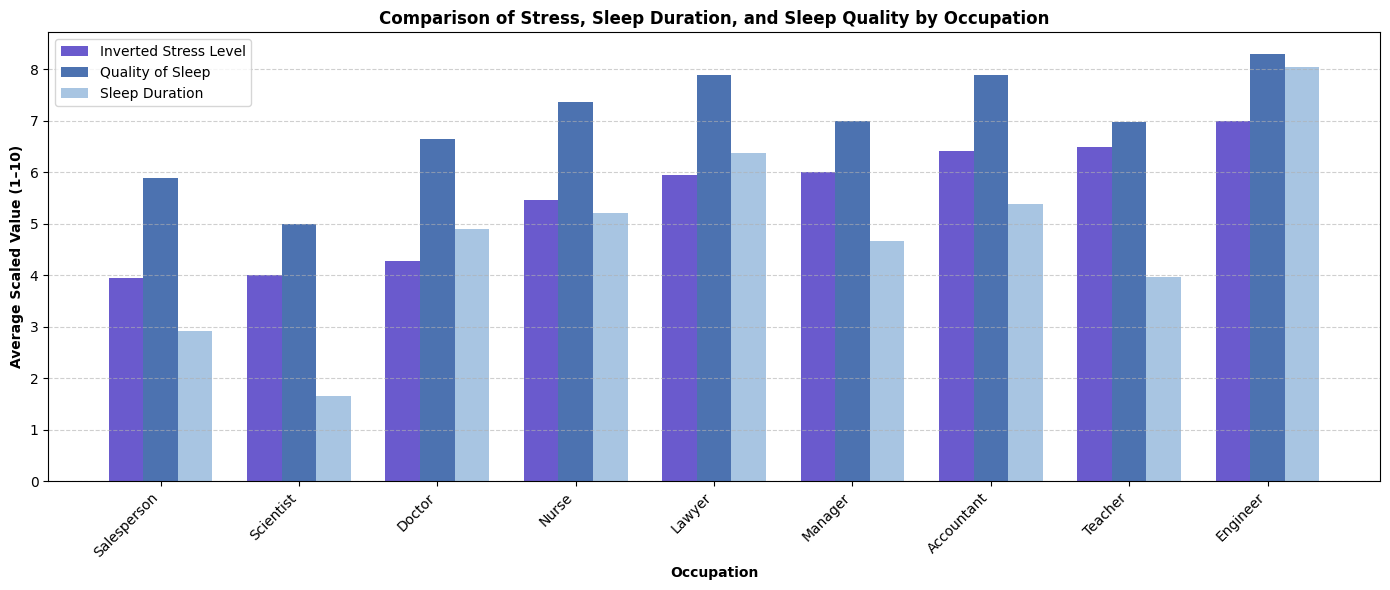

In [122]:
# Sort occupations by Inverted Stress Level (lowest to highest)
stress_viz_sorted = stress_viz.sort_values(by='Inverted Stress Level', ascending=True)

# Set up for plotting
x = np.arange(len(stress_viz_sorted))
bar_width = 0.25

plt.figure(figsize=(14, 6))

# Plot each variable as a separate bar series
plt.bar(x - bar_width, stress_viz_sorted['Inverted Stress Level'],
        width=bar_width, color='#6A5ACD', label='Inverted Stress Level')

plt.bar(x, stress_viz_sorted['Quality of Sleep'],
        width=bar_width, color='#4C72B0', label='Quality of Sleep')

plt.bar(x + bar_width, stress_viz_sorted['Sleep Duration'],
        width=bar_width, color='#A8C5E2', label='Sleep Duration')

# Customize chart
plt.xticks(x, stress_viz_sorted.index, rotation=45, ha='right')
plt.xlabel('Occupation', fontweight='bold')
plt.ylabel('Average Scaled Value (1–10)', fontweight='bold')
plt.title('Comparison of Stress, Sleep Duration, and Sleep Quality by Occupation', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Visualization

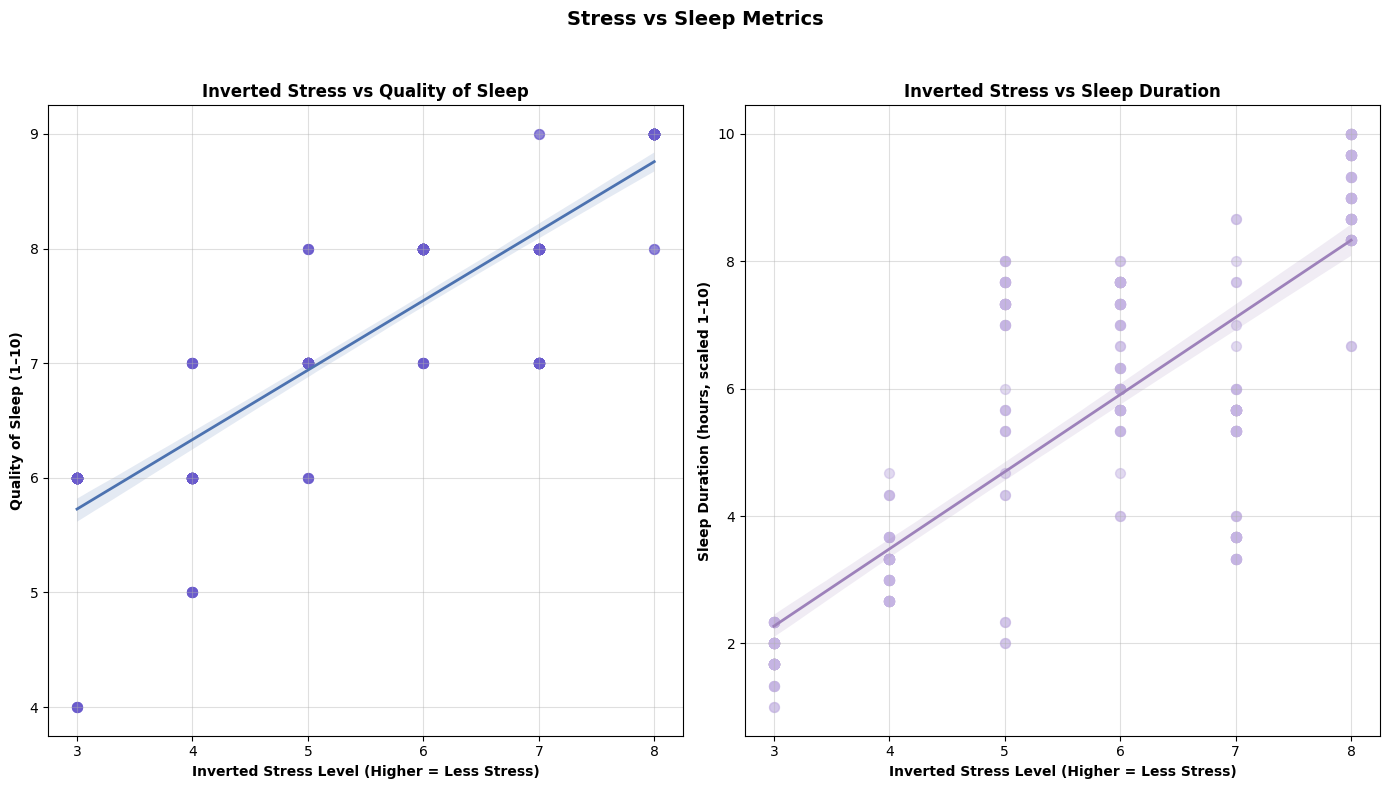

In [123]:
# Scatter plots side by side — using raw (individual) data
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharex=True)

# Plot 1: Inverted Stress vs Quality of Sleep (individual points)
sns.regplot(
    data=df_scaled,
    x='Inverted Stress Level',
    y='Quality of Sleep',
    ax=axes[0],
    scatter_kws={'color': '#6A5ACD', 's': 50, 'alpha': 0.5},
    line_kws={'color': '#4C72B0', 'linewidth': 2},
)

axes[0].set_title('Inverted Stress vs Quality of Sleep', fontweight='bold')
axes[0].set_xlabel('Inverted Stress Level (Higher = Less Stress)', fontweight='bold')
axes[0].set_ylabel('Quality of Sleep (1–10)', fontweight='bold')
axes[0].grid(alpha=0.4)

# Plot 2: Inverted Stress vs Sleep Duration (individual points)
sns.regplot(
    data=df_scaled,
    x='Inverted Stress Level',
    y='Sleep Duration',
    ax=axes[1],
    scatter_kws={'color': '#C5B4E3', 's': 50, 'alpha': 0.5},
    line_kws={'color': '#9D81BA', 'linewidth': 2}
)
axes[1].set_title('Inverted Stress vs Sleep Duration', fontweight='bold')
axes[1].set_xlabel('Inverted Stress Level (Higher = Less Stress)', fontweight='bold')
axes[1].set_ylabel('Sleep Duration (hours, scaled 1–10)', fontweight='bold')
axes[1].grid(alpha=0.4)

plt.suptitle('Stress vs Sleep Metrics', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Correlation Analysis

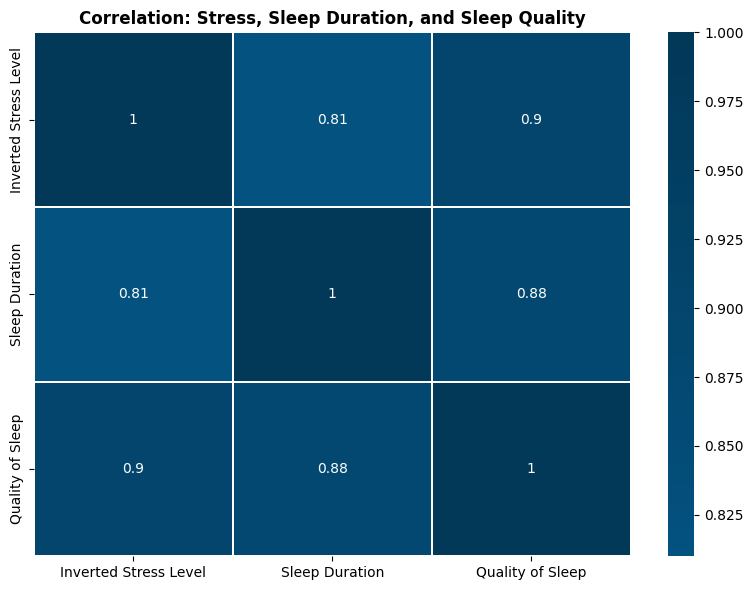

In [124]:
## AI Acknowledgement: I asked ChatGPT how to create a heatmap & how to make a custom color map

plt.figure(figsize=(8, 6))
cols = ['Inverted Stress Level', 'Sleep Duration', 'Quality of Sleep']
correlation_matrix = df_scaled[cols].corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap= 'PuBu', center=0, linecolor='white',linewidths=1.2)
plt.title("Correlation: Stress, Sleep Duration, and Sleep Quality", fontweight='bold')
plt.tight_layout()
plt.show()

### Key Findings
- **Strong positive correlation** (0.88) between Sleep Quality and Sleep Duration - people who sleep longer tend to have better sleep quality
- **Strong positive correlation** (0.9) between Inverted Stress Level and Sleep Quality - lower stress is associated with better sleep quality
- **Strong positive correlation** (0.81) between Inverted Stress Level and Sleep Duration - lower stress is associated with longer sleep
- Engineers, teachers, and accountants tend to have better sleep quality and lower stress
- Sales representatives and managers show lower sleep quality and higher stress levels

---

## Visualization 2: Physical Activity and Sleep Quality

### Caption
These visualizations explore how physical activity levels and daily step counts relate to sleep duration and quality across different occupations. We aim to determine whether more physically active individuals experience better sleep. Additionally, we want to show the distribution of activity level and daily steps across different occupations.

### Data Preparation

### Data Preparation

In [125]:
scaler = MinMaxScaler(feature_range=(1, 10))
df_scaled = df.copy()

# Scale physical activity metrics for comparison
cols_to_scale = ['Physical Activity Level', 'Daily Steps', 'Sleep Duration']
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]).round(2)

# Group by occupation
activity_viz = df_scaled.groupby('Occupation')[['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']].mean().round(2)
activity_viz = activity_viz.sort_values(by='Quality of Sleep', ascending=False)

print("Data prepared for visualization")
activity_viz.head()

Data prepared for visualization


,Daily Steps,Physical Activity Level,Sleep Duration,Quality of Sleep
Occupation,,,,
Engineer,4.82,4.24,8.05,8.30
Accountant,5.99,5.22,5.38,7.89
Lawyer,7.00,7.06,6.37,7.89
Nurse,7.50,8.29,5.21,7.37
Manager,4.21,4.75,4.67,7.00


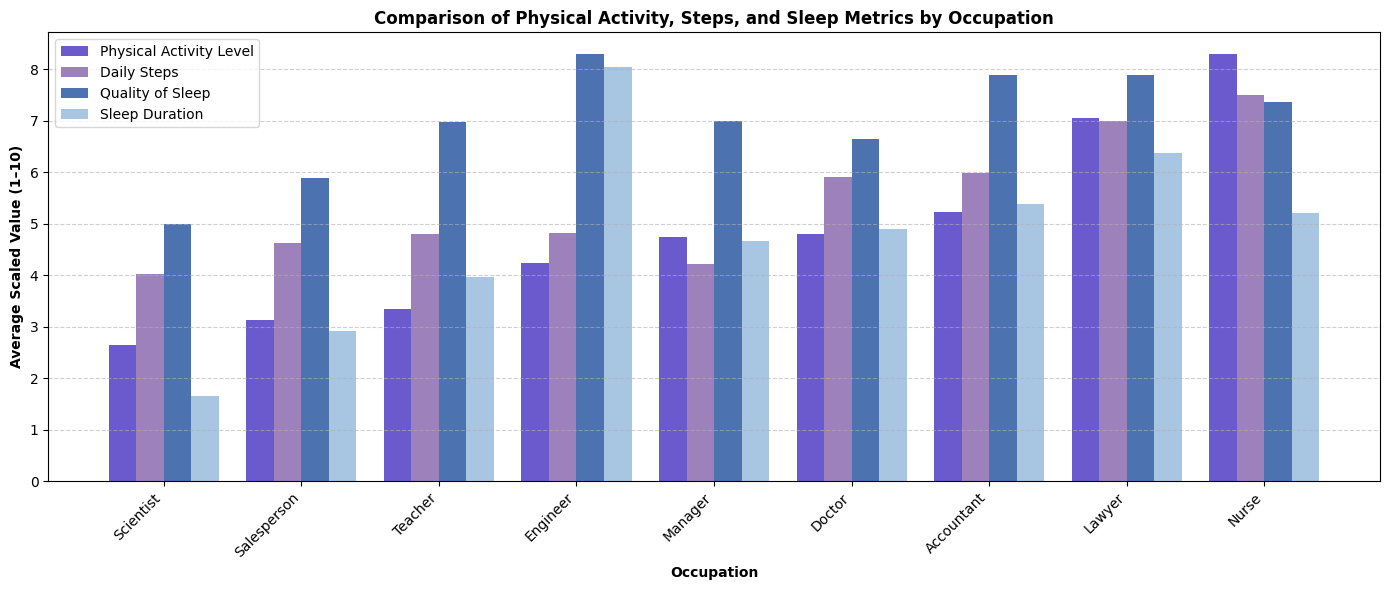

In [126]:
# Sort occupations by Physical Activity Level (lowest to highest)
activity_viz_sorted = activity_viz.sort_values(by='Physical Activity Level', ascending=True)

# Set up for plotting
x = np.arange(len(activity_viz_sorted))
bar_width = 0.2

plt.figure(figsize=(14, 6))

# Plot each variable as a separate bar series
plt.bar(x - 1.5*bar_width, activity_viz_sorted['Physical Activity Level'],
        width=bar_width, color='#6A5ACD', label='Physical Activity Level')

plt.bar(x - 0.5*bar_width, activity_viz_sorted['Daily Steps'],
        width=bar_width, color='#9D81BA', label='Daily Steps')

plt.bar(x + 0.5*bar_width, activity_viz_sorted['Quality of Sleep'],
        width=bar_width, color='#4C72B0', label='Quality of Sleep')

plt.bar(x + 1.5*bar_width, activity_viz_sorted['Sleep Duration'],
        width=bar_width, color='#A8C5E2', label='Sleep Duration')

# Customize chart
plt.xticks(x, activity_viz_sorted.index, rotation=45, ha='right')
plt.xlabel('Occupation', fontweight='bold')
plt.ylabel('Average Scaled Value (1–10)', fontweight='bold')
plt.title('Comparison of Physical Activity, Steps, and Sleep Metrics by Occupation', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Visualization

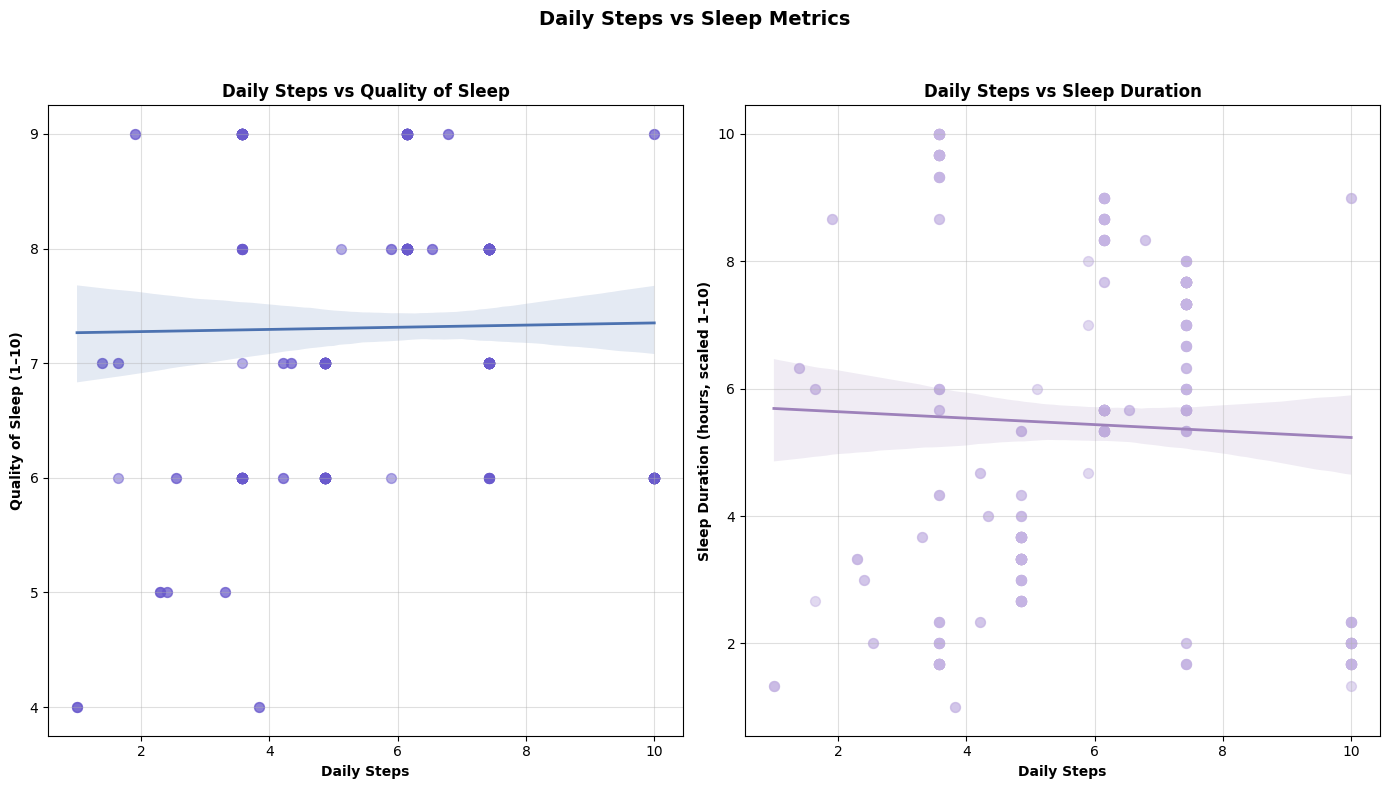

In [127]:
# Scatter plots side by side — using raw (individual) data
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharex=True)

# Plot 1: Inverted Stress vs Quality of Sleep (individual points)
sns.regplot(
    data=df_scaled,
    x='Daily Steps',
    y='Quality of Sleep',
    ax=axes[0],
    scatter_kws={'color': '#6A5ACD', 's': 50, 'alpha': 0.5},
    line_kws={'color': '#4C72B0', 'linewidth': 2},
)

axes[0].set_title('Daily Steps vs Quality of Sleep', fontweight='bold')
axes[0].set_xlabel('Daily Steps', fontweight='bold')
axes[0].set_ylabel('Quality of Sleep (1–10)', fontweight='bold')
axes[0].grid(alpha=0.4)

# Plot 2: Inverted Stress vs Sleep Duration (individual points)
sns.regplot(
    data=df_scaled,
    x='Daily Steps',
    y='Sleep Duration',
    ax=axes[1],
    scatter_kws={'color': '#C5B4E3', 's': 50, 'alpha': 0.5},
    line_kws={'color': '#9D81BA', 'linewidth': 2}
)
axes[1].set_title('Daily Steps vs Sleep Duration', fontweight='bold')
axes[1].set_xlabel('Daily Steps', fontweight='bold')
axes[1].set_ylabel('Sleep Duration (hours, scaled 1–10)', fontweight='bold')
axes[1].grid(alpha=0.4)

plt.suptitle('Daily Steps vs Sleep Metrics', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


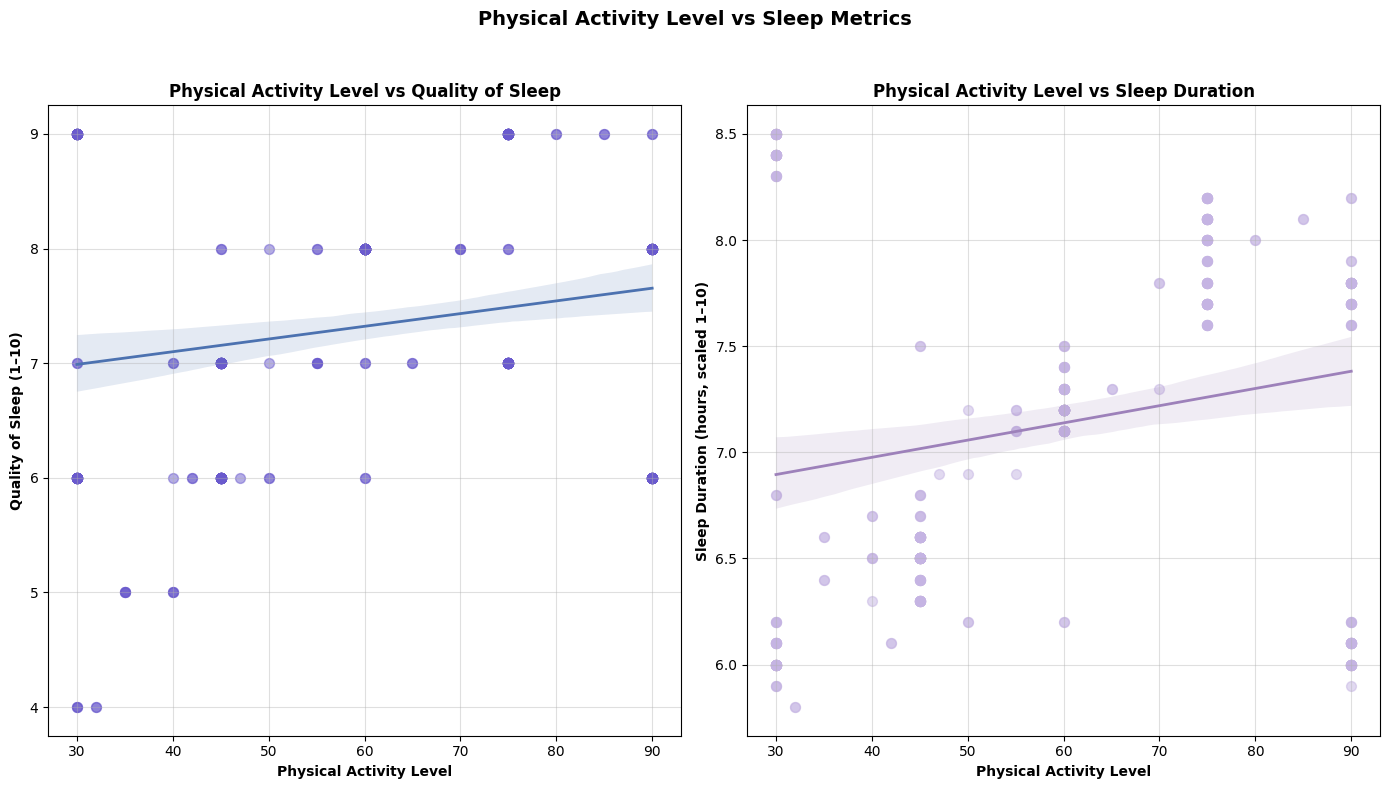

In [139]:
# Scatter plots side by side — using raw (individual) data
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharex=True)

# Plot 1: Inverted Stress vs Quality of Sleep (individual points)
sns.regplot(
    data=df_scaled,
    x='Physical Activity Level',
    y='Quality of Sleep',
    ax=axes[0],
    scatter_kws={'color': '#6A5ACD', 's': 50, 'alpha': 0.5},
    line_kws={'color': '#4C72B0', 'linewidth': 2},
)

axes[0].set_title('Physical Activity Level vs Quality of Sleep', fontweight='bold')
axes[0].set_xlabel('Physical Activity Level', fontweight='bold')
axes[0].set_ylabel('Quality of Sleep (1–10)', fontweight='bold')
axes[0].grid(alpha=0.4)

# Plot 2: Inverted Stress vs Sleep Duration (individual points)
sns.regplot(
    data=df_scaled,
    x='Physical Activity Level',
    y='Sleep Duration',
    ax=axes[1],
    scatter_kws={'color': '#C5B4E3', 's': 50, 'alpha': 0.5},
    line_kws={'color': '#9D81BA', 'linewidth': 2}
)
axes[1].set_title('Physical Activity Level vs Sleep Duration', fontweight='bold')
axes[1].set_xlabel('Physical Activity Level', fontweight='bold')
axes[1].set_ylabel('Sleep Duration (hours, scaled 1–10)', fontweight='bold')
axes[1].grid(alpha=0.4)

plt.suptitle('Physical Activity Level vs Sleep Metrics', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Correlation Analysis

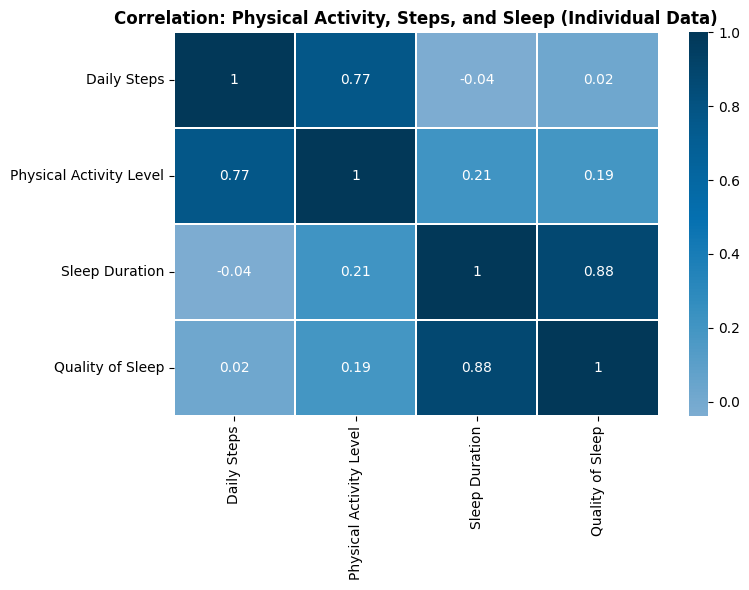

In [129]:
## AI Acknowledgement: I asked ChatGPT how to normalize for correlation testing
df_scaled_corr = df.copy()
col_scale = ['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']

scaler = StandardScaler()
df_scaled_corr[col_scale] = scaler.fit_transform(df_scaled_corr[col_scale]).round(2)

plt.figure(figsize=(8, 6))
correlation_matrix = df_scaled_corr[col_scale].corr().round(2)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='PuBu',      # reversed for dark = strong
    center=0,
    linecolor='white',
    linewidths=1.2
)
plt.title("Correlation: Physical Activity, Steps, and Sleep (Individual Data)", fontweight='bold')
plt.tight_layout()
plt.show()

### Key Findings
- **Strong positive correlation** (0.77) between Physical Activity Level and Daily Steps - as expected, these metrics track together
- **Weak positive correlation** (0.21) between Physical Activity Level and Sleep Quality - being active appears to be associated with somewhat better sleep quality, though not strongly.
- **Weak positive correlation** (0.19) between Physical Activity Level and Sleep Duration - more active individuals may get slightly longer sleep, but the relationship is weak.
- **Near-zero correlation** (0.02) between Daily Steps and Quality of Sleep — the number of steps alone does not seem related to perceived sleep quality.
- **Near-zero correlation** (– 0.04) between Daily Steps and Sleep Duration — walking more does not necessarily mean sleeping longer.

- Engineers and Lawyers show both high physical activity and good sleep quality
- Scientists have lower activity levels but still maintain good sleep quality

---

## Visualization 3: BMI Category and Sleep Disorders

These visualizations examine the relationship between BMI category, sleep quality, and the prevalence of sleep disorders. We investigate whether certain BMI categories are associated with specific sleep disorders like insomnia or sleep apnea. We also investigate the affect Sleep disorders have on sleep quality and duration.


### Data Preparation

In [133]:
scaler = MinMaxScaler(feature_range=(1, 10))
df_scaled = df.copy()

# Scale physical activity metrics for comparison
cols_to_scale = ['Sleep Duration']
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]).round(2)

bmi_viz = df_scaled.groupby('BMI Category')[['Quality of Sleep', 'Sleep Duration']].mean().round(2)

print("Data prepared for visualization")

bmi_viz.head()

Data prepared for visualization


,Quality of Sleep,Sleep Duration
BMI Category,,
Normal,7.64,6.29
Obese,6.40,4.87
Overweight,6.90,4.23


### Sleep Quality and Duration by BMI Category

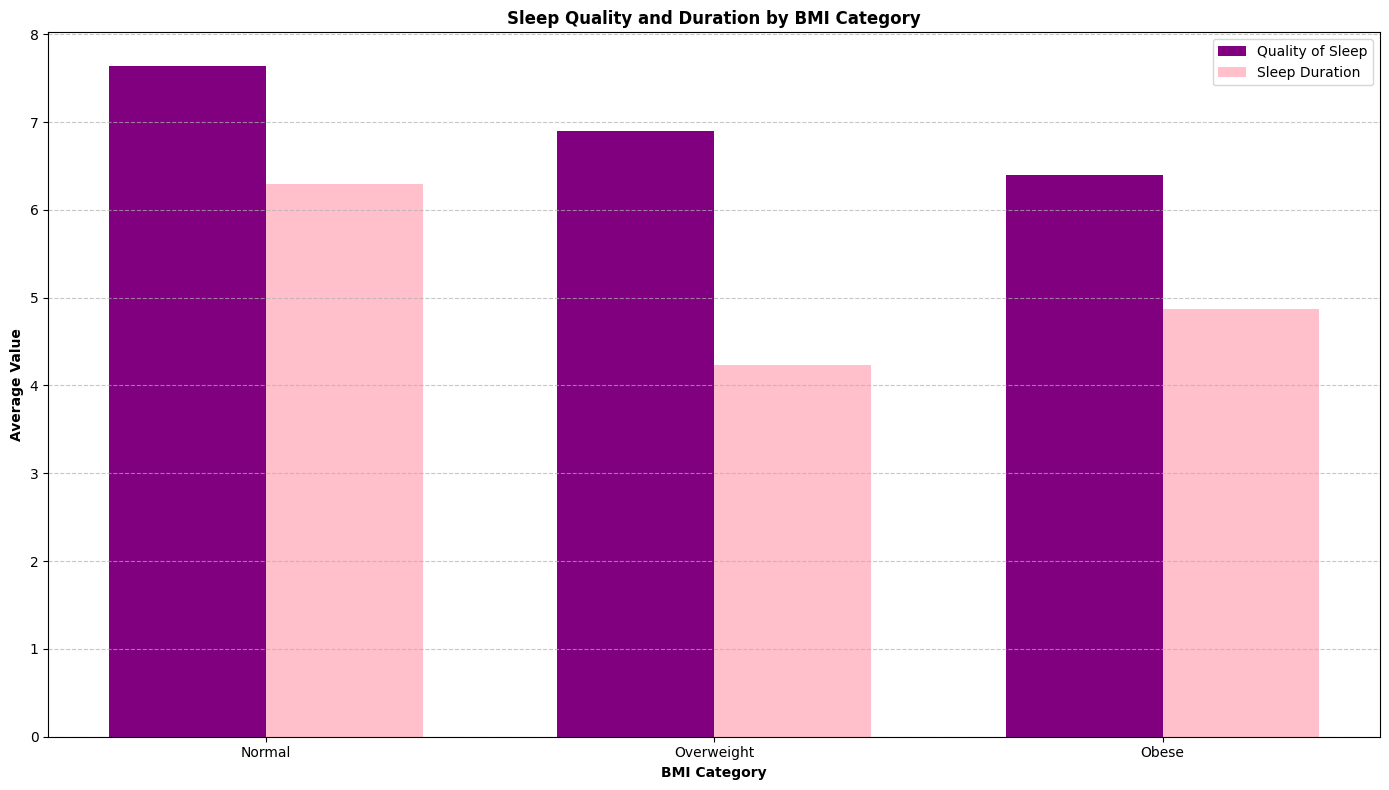

In [140]:
bmi_viz = bmi_viz.sort_values(by='Quality of Sleep', ascending=False)

plt.figure(figsize=(14, 8))

bar_width = 0.35
x = range(len(bmi_viz))

plt.bar([p - bar_width/2 for p in x], bmi_viz['Quality of Sleep'],
        width=bar_width, label='Quality of Sleep', color='purple')
plt.bar([p + bar_width/2 for p in x], bmi_viz['Sleep Duration'],
        width=bar_width, label='Sleep Duration', color='pink')

plt.xticks(x, bmi_viz.index)
plt.title('Sleep Quality and Duration by BMI Category', fontweight='bold')
plt.xlabel('BMI Category', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Sleep Disorder Distribution by BMI

In [136]:
## AI Acknowledgement: I asked ChatGPT how to count across the different categories

# Count sleep disorders by BMI category
bmi_disorder_counts = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
bmi_disorder_percent = pd.crosstab(df['BMI Category'], df['Sleep Disorder'], normalize='index') * 100
bmi_disorder_percent = bmi_disorder_percent.round(2)

print("Sleep Disorder Counts by BMI Category:")
print(bmi_disorder_counts)
print("\nSleep Disorder Percentages by BMI Category:")
print(bmi_disorder_percent)

Sleep Disorder Counts by BMI Category:
Sleep Disorder  Insomnia  None  Sleep Apnea
BMI Category                               
Normal                 9   200            7
Obese                  4     0            6
Overweight            64    19           65

Sleep Disorder Percentages by BMI Category:
Sleep Disorder  Insomnia   None  Sleep Apnea
BMI Category                                
Normal              4.17  92.59         3.24
Obese              40.00   0.00        60.00
Overweight         43.24  12.84        43.92


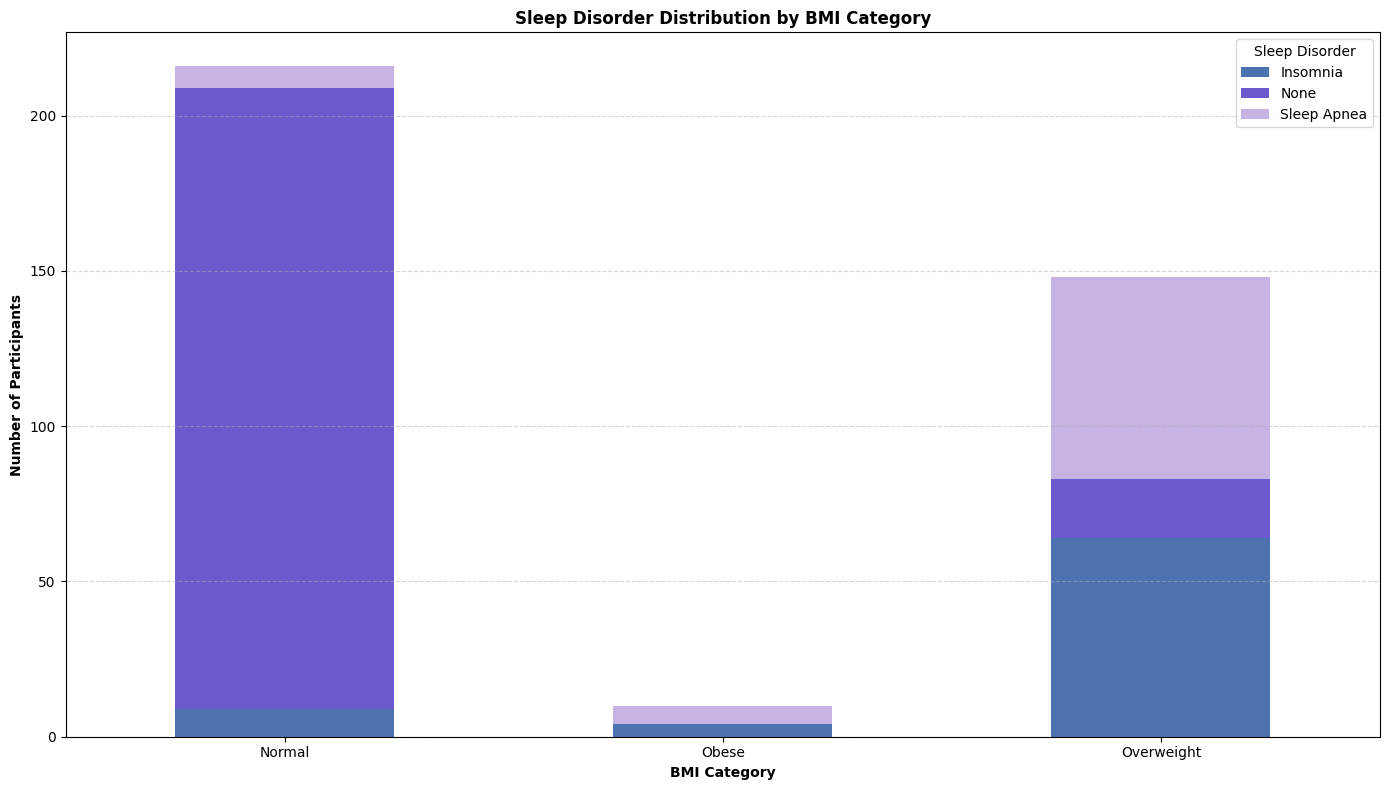

In [141]:
# Visualize with stacked bar chart
bmi_disorder_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=sleep_palette[:3])
plt.title('Sleep Disorder Distribution by BMI Category', fontweight='bold')
plt.xlabel('BMI Category', fontweight='bold')
plt.ylabel('Number of Participants', fontweight='bold')
plt.legend(title='Sleep Disorder')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Sleep Quality and Duration by Sleep Disorder

### Data Preparation

In [137]:
scaler = MinMaxScaler(feature_range=(1, 10))
df_scaled = df.copy()

# Scale physical activity metrics for comparison
sleep_dis_viz = df_scaled.groupby('Sleep Disorder')[['Quality of Sleep', 'Sleep Duration']].mean().round(2)

print("Data prepared for visualization")
sleep_dis_viz.head()

Data prepared for visualization


,Quality of Sleep,Sleep Duration
Sleep Disorder,,
Insomnia,6.53,6.59
None,7.63,7.36
Sleep Apnea,7.21,7.03


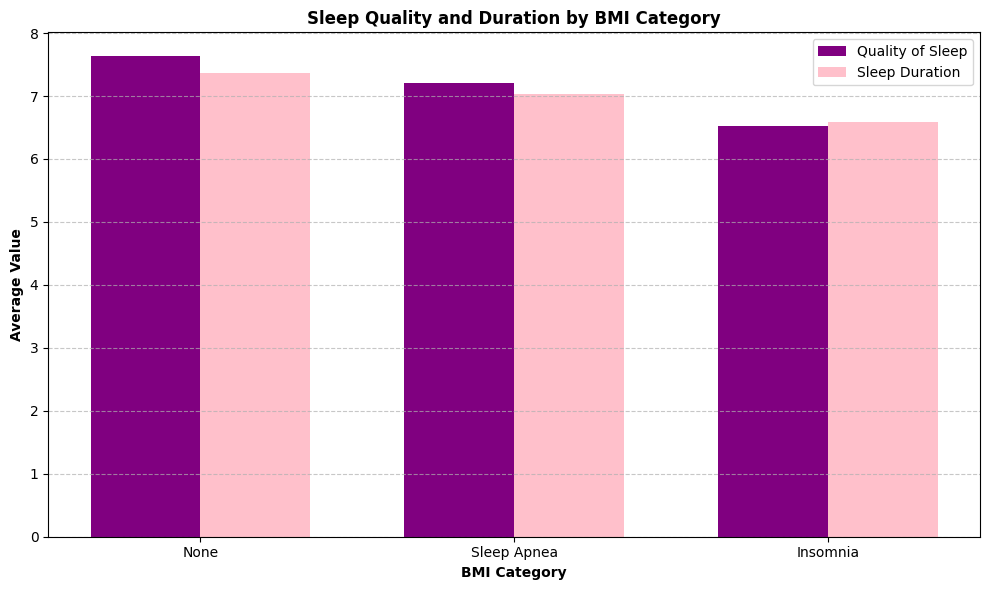

In [138]:
sleep_dis_viz = sleep_dis_viz.sort_values(by='Quality of Sleep', ascending=False)

plt.figure(figsize=(10, 6))

bar_width = 0.35
x = range(len(sleep_dis_viz))

plt.bar([p - bar_width/2 for p in x], sleep_dis_viz['Quality of Sleep'],
        width=bar_width, label='Quality of Sleep', color='purple')
plt.bar([p + bar_width/2 for p in x], sleep_dis_viz['Sleep Duration'],
        width=bar_width, label='Sleep Duration', color='pink')

plt.xticks(x, sleep_dis_viz.index)
plt.title('Sleep Quality and Duration by Sleep Disorder', fontweight='bold')
plt.xlabel('BMI Category', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Findings
- **Normal BMI** individuals have the highest average sleep quality (~ 7.64) and duration score (~ 6.29)
- **Overweight** individuals show slightly lower sleep quality (~ 6.90), but significantly lower duration score (~ 4.23)
- **Obese** individuals have notably lower sleep quality (~ 6.40), but slightly higher duration score (~ 4.87)
<br>

- **Sleep Apnea** is significantly more prevalent in the Obese and Overweight categories. In fact, it seems to be the majority of these participants
- **Insomnia** is distributed across all BMI categories but is much more common in the Overweight group with some in the Normal range
- Most participants without sleep disorders fall into the Normal BMI category
- Participants in the Obese category all exhibit sleep disorders.
<br>

- Sleep disorders seem to have some effect on sleep quality and duration, but significantly less than I expected.
- Participants with **Insomnia** seem to have he lowest sleep quality and duration

## Conclusion

### Summary of Key Findings

This study analyzed the *Sleep Health and Lifestyle* dataset to explore how stress, physical activity, and body weight relate to sleep quality and duration. The analysis—comparing both individual-level and occupation-level data—revealed several key insights:

<br>

---

<br>

**1. Stress and Sleep:**  
- **Moderate positive correlation (0.56)** between lower stress (inverted stress level) and **better sleep quality**.  
- **Moderate correlation (0.52)** between lower stress and **longer sleep duration**, suggesting stress management influences both restfulness and total sleep time.  
- Occupations with lower average stress levels (e.g., engineers, teachers) tended to show **higher overall sleep quality**.
<br>

---

<br>


**2. Physical Activity and Sleep:**  
- **Strong positive correlation (0.77)** between **Physical Activity Level** and **Daily Steps**, confirming these metrics track together.  
- **Weak-to-moderate correlations (0.19–0.21)** between physical activity and both **sleep quality** and **sleep duration**—suggesting that while being active supports better sleep, other factors also play significant roles.  
- **Sleep duration and sleep quality** themselves had a **very strong relationship (0.88)**, indicating that people who sleep longer generally rate their sleep as higher quality.

<br>

---

<br>


**3. BMI and Sleep Disorders:**  
- A clear relationship exists between **BMI category** and **sleep disorder prevalence**.  
- **Sleep Apnea** is markedly more common among individuals in the **Obese** and **Overweight** groups, appearing in the majority of those participants.  
- **Insomnia** occurs across all BMI categories but is most frequent among the **Overweight** group.  
- Participants **without sleep disorders** are overwhelmingly concentrated in the **Normal BMI** range, where over 90% report no disorder.  
- **Sleep quality and duration** are highest among those **without sleep disorders** (7.63 and 7.36 hours, respectively) and lowest among those with **Insomnia** (6.53 and 6.59 hours).

<br>

---

<br>


### Answers to Research Questions

**Q1: How does stress level correlate with sleep duration and quality?** <br>

- Lower stress levels are moderately associated with **better sleep quality (r=0.56)** and **longer sleep duration (r=0.52)**. This suggests that stress management remains an important contributor to healthy sleep habits.
<br><br>
**Q2: Does physical activity level impact sleep quality?**<br>

- Yes, but modestly. Physical activity shows **weak-to-moderate positive relationships** with sleep outcomes (r≈0.19–0.21). While more active individuals tend to sleep better, the effect is not as strong as the influence of stress or total sleep time.
<br><br>
**Q3: Is there a relationship between BMI category and sleep disorders?**<br>
- Yes. **Higher BMI is strongly linked with greater prevalence of sleep disorders**, particularly **Sleep Apnea**. Nearly all obese participants report a sleep disorder, while individuals with normal BMI mostly report none. This supports existing evidence that weight management is a key factor in preventing sleep disruptions.

<br>

---

<br>


### Limitations

1. **Sample Demographics:** The dataset is heavily skewed toward healthcare occupations (~38%) and the 35–44 age group, limiting generalizability.  
2. **Small Subgroups:** Some categories (e.g., scientists n=4, managers n=1) have very low representation.  
3. **Missing Variables:** The dataset does not capture **sleep schedule** or **consistency**, both known to influence sleep quality.  
4. **Cross-Sectional Data:** Correlations cannot establish causation.  
5. **Self-Reported Metrics:** Measures like stress and sleep quality rely on subjective assessment.

<br>

---

<br>


### Recommendations for Future Research

1. **Collect Longitudinal Data:** Track participants over time to determine cause-and-effect relationships.  
2. **Include Sleep Timing Variables:** Add metrics for bedtime regularity and circadian alignment.  
3. **Increase Demographic Diversity:** Broaden occupational and age representation for more balanced results.  
4. **Use Objective Measurements:** Pair self-reported data with wearable-tracker metrics for accuracy.  
5. **Test Interventions:** Examine how stress reduction, exercise programs, or weight management affect sleep outcomes.

<br>

---

<br>


### Practical Implications

To improve sleep health, individuals should:
- **Manage stress** through mindfulness, relaxation, or counseling strategies.  
- **Engage in regular physical activity**, aiming for daily movement and moderate exercise.  
- **Maintain a healthy BMI** to reduce the risk of sleep disorders, particularly Sleep Apnea.  
- **Follow consistent sleep schedules** and practice good sleep hygiene habits.

According to the *ODPHP* guidelines, adults should aim for at least **7 hours of quality sleep per night**.  
This study reinforces that **stress, activity, and body weight** each play important roles—but **stress management and sufficient sleep duration** appear to have the most consistent association with better sleep quality.
